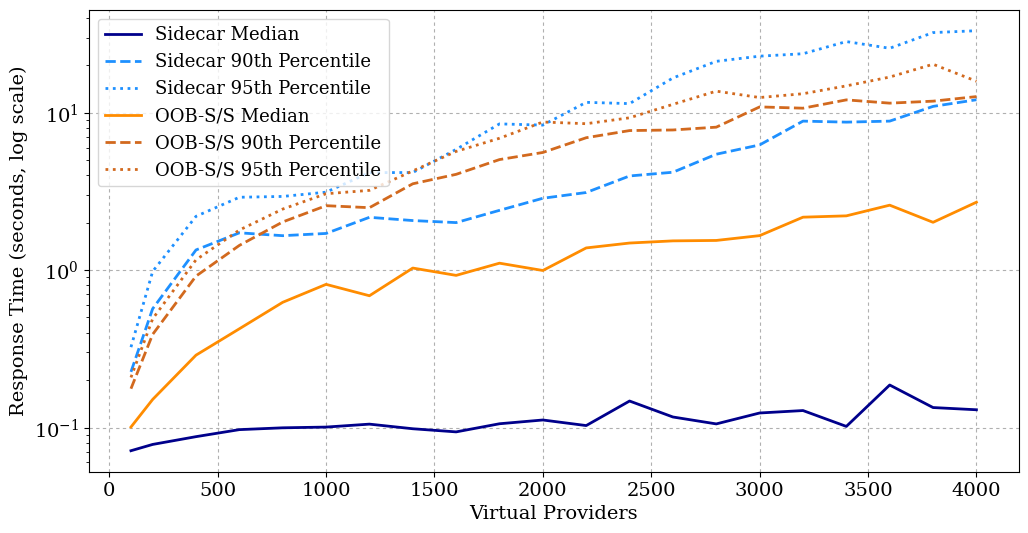

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Constants
oobss = 'oob-s/s'
jodi = 'jodi'
name = "Sidecar"

# Set global font settings to a serif font like Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 14  

# Load the CSV file
df = pd.read_csv('../k6-rt.csv')

# Convert response times from milliseconds to seconds
df["Median"] = df["Median"] / 1000
df["P(90)"] = df["P(90)"] / 1000
df["P(95)"] = df["P(95)"] / 1000
df["Protocol"] = df["Protocol"].str.lower()

# ------------------------------ Response Time Chart ------------------------------
plt.figure(figsize=(12, 6))

# Define consistent colors and markers
color_medians = {jodi: "darkblue", oobss: "darkorange"}
color_percentiles = {jodi: "dodgerblue", oobss: "chocolate"}
markers = {
    "Median": "o",
    "P(90)": "s",
    "P(95)": "^"
}

# Process each protocol separately
for protocol in [jodi, oobss]:
    subset = df[df["Protocol"] == protocol].sort_values("VUs")
    proto = name if protocol == 'jodi' else protocol.upper()
    # Plot straight lines with markers
    plt.plot(subset["VUs"], subset["Median"],
             color=color_medians[protocol], linestyle="solid", linewidth=2,
             label=f"{proto} Median")

    plt.plot(subset["VUs"], subset["P(90)"],
             color=color_percentiles[protocol], linestyle="dashed", linewidth=2,
             label=f"{proto} 90th Percentile")

    plt.plot(subset["VUs"], subset["P(95)"],
             color=color_percentiles[protocol], linestyle="dotted", linewidth=2,
             label=f"{proto} 95th Percentile")

# Set log scale for y-axis
plt.yscale("log")

# Labels, title, and grid
plt.xlabel("Virtual Providers", fontsize=14)
plt.ylabel("Response Time (seconds, log scale)", fontsize=14)
plt.legend(title="", fontsize=13, title_fontsize=13)
plt.grid(True, linestyle=(0, (3, 3)), linewidth=0.8, zorder=0)

# Save to PDF (Preserve UI exactly, no extra borders)
plt.savefig("../charts/res-time.pdf", bbox_inches='tight', dpi=300)
plt.show()
